Seaborn 복습, 이해도 넓히기

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [ ]:
#seaborn에서 사용할 수 있는게 여러개 있으니 사용설명서 따라서 내가 써야하는거 잘 보고 골라 쓰기
#https://seaborn.pydata.org/tutorial/function_overview.html
#replot인지, displot, catplot 등 

In [4]:
url = 'https://raw.githubusercontent.com/jakevdp/marathon-data/master/marathon-data.csv'
data=pd.read_csv(url)

In [5]:
data.head()

,age,gender,split,final
0,33,M,01:05:38,02:08:51
1,32,M,01:06:26,02:09:28
2,31,M,01:06:49,02:10:42
3,38,M,01:06:16,02:13:45
4,31,M,01:06:32,02:13:59


In [6]:
data.dtypes

age        int64
gender    object
split     object
final     object
dtype: object

In [7]:
from datetime import timedelta
def convert_time(s):
     h, m, s = map(int, s.split(':'))
     return timedelta(hours=h, minutes=m, seconds=s)

In [9]:
data=pd.read_csv('https://raw.githubusercontent.com/jakevdp/marathon-data/master/marathon-data.csv',converters={'split':convert_time, 'final':convert_time})
data.head()
#read_csv하면서, 위에서 timedelta로 변환하는 함수를 사용해주었기때문에 converters하는걸로.
#그래서 split과 final이 timedelta로 변환하여 return 된것을 볼수있음 

,age,gender,split,final
0,33,M,0 days 01:05:38,0 days 02:08:51
1,32,M,0 days 01:06:26,0 days 02:09:28
2,31,M,0 days 01:06:49,0 days 02:10:42
3,38,M,0 days 01:06:16,0 days 02:13:45
4,31,M,0 days 01:06:32,0 days 02:13:59


In [10]:
data.dtypes

age                 int64
gender             object
split     timedelta64[ns]
final     timedelta64[ns]
dtype: object

In [12]:
#seaborn플로팅을 하기 위해서, 시간을 초로 제공하는 열을 추가함.
data['split_sec']=data['split'].dt.total_seconds()
data['final_sec']=data['final'].dt.total_seconds()
data.head()

,age,gender,split,final,split_sec,final_sec
0,33,M,0 days 01:05:38,0 days 02:08:51,3938.0,7731.0
1,32,M,0 days 01:06:26,0 days 02:09:28,3986.0,7768.0
2,31,M,0 days 01:06:49,0 days 02:10:42,4009.0,7842.0
3,38,M,0 days 01:06:16,0 days 02:13:45,3976.0,8025.0
4,31,M,0 days 01:06:32,0 days 02:13:59,3992.0,8039.0


In [23]:
data['split_sec'].apply(convert_time)
#이거는 추가하지 않고 apply(함수)로 통으로 저걸 적용해달라는말. 

AttributeError: 'float' object has no attribute 'split'

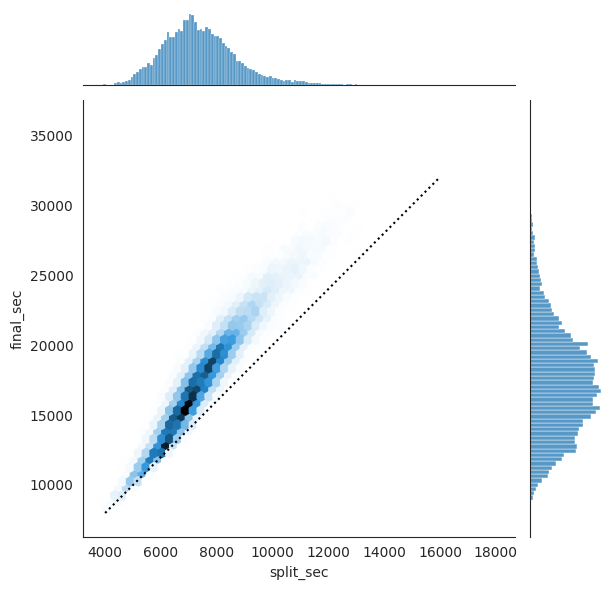

In [13]:
#이 데이터를 확인해보기 위하여 joinplot 해보기로.
with sns.axes_style('white'):
     g=sns.jointplot(x="split_sec", y="final_sec", data=data, kind='hex')
     g.ax_joint.plot(np.linspace(4000, 16000), 
                     np.linspace(8000, 32000), ':k')
     #linspace는 일정간격 점생성이기때문에, 그 범위만 ㅈㅣ정해주면 알아서 균등한 간격이 생성된다는거. 내가 찝지 않아도
     #:k는 검정색 선으로 데이터의 추세를더 잘보여주고자하는 보조장치 

In [14]:
data['split_frac']=1 - 2*data['split_sec']/data['final_sec']
data.head()

,age,gender,split,final,split_sec,final_sec,split_frac
0,33,M,0 days 01:05:38,0 days 02:08:51,3938.0,7731.0,-0.018756
1,32,M,0 days 01:06:26,0 days 02:09:28,3986.0,7768.0,-0.026262
2,31,M,0 days 01:06:49,0 days 02:10:42,4009.0,7842.0,-0.022443
3,38,M,0 days 01:06:16,0 days 02:13:45,3976.0,8025.0,0.009097
4,31,M,0 days 01:06:32,0 days 02:13:59,3992.0,8039.0,0.006842


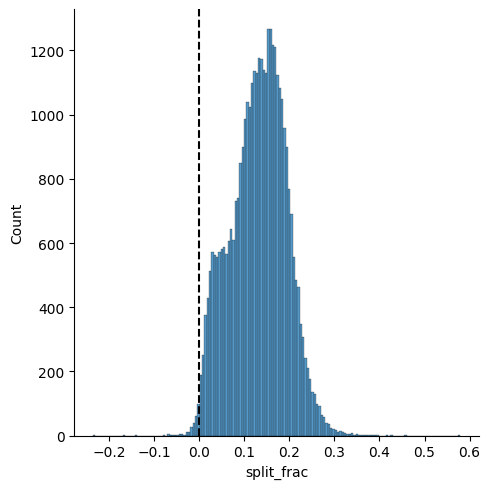

In [15]:
sns.displot(data['split_frac'],kde=False);
plt.axvline(0, color='k', linestyle="--");
#displot으로 히스토그램 그리기, 데이터는 저 열에 관한거고 kde=False는 커널 밀도 추정(KDE) 곡선을 히스토그램 위에 그리지 않도록 설정
#기본값은 원래 저 히스토 위에 커널 곡선이 함께 그려지므로.
#밑에거는 수직선 그리는 방법. 0은 위치, k는 컬러
#히스토그램은 별도 y축을 설정하지 않아도 자동으로 count로 y축이 설정됨. 자동으로 그 갯수를 세어주는거지.!!!

In [16]:
sum(data.split_frac < 0)

251

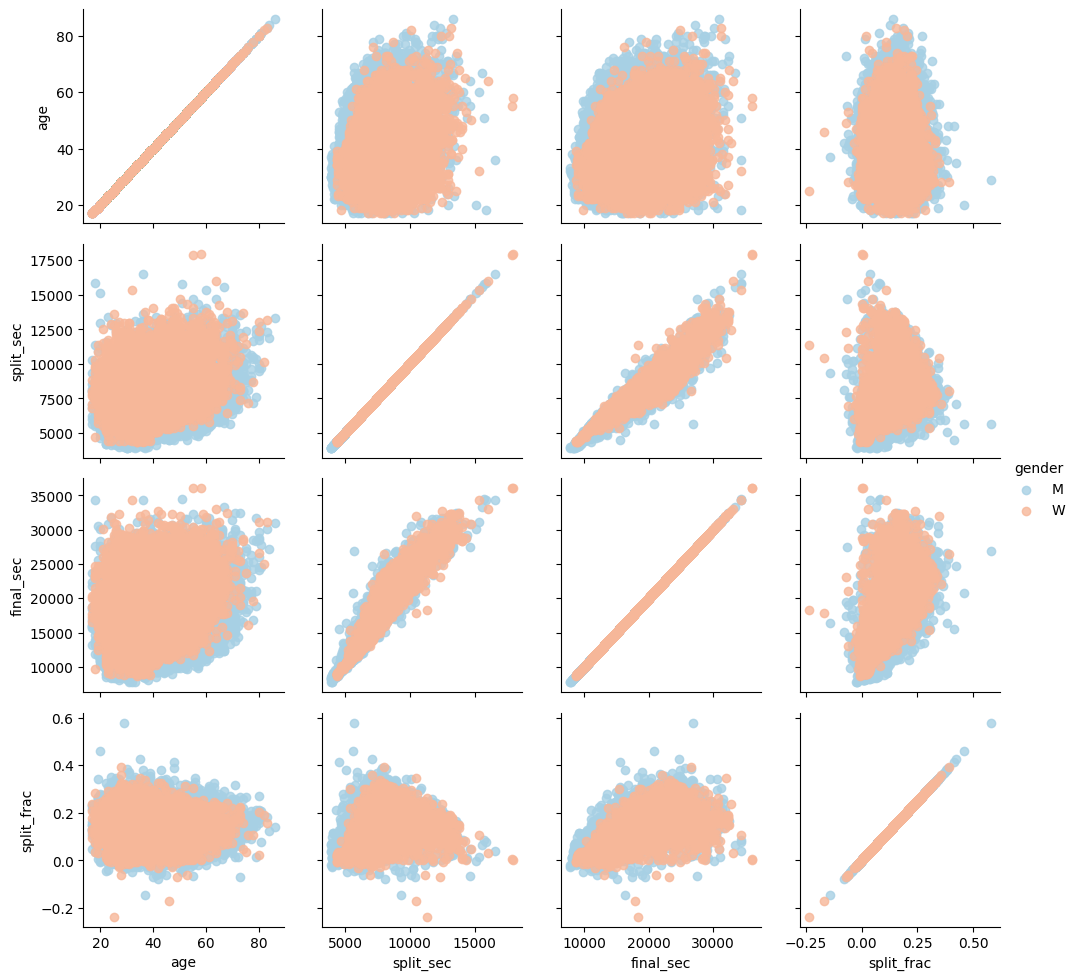

In [17]:
g = sns.PairGrid(data, vars=['age','split_sec','final_sec','split_frac'],
                 hue='gender',palette='RdBu_r')
g.map(plt.scatter, alpha=0.8)
g.add_legend();

In [21]:
data['age_dec']=data.age.map(lambda age: 10*(age//10))
#age_dec이라는 열은 나이를 10단위로 그룹화한거. 내림해서 몇십대인지.20대 30대 이렇게. 
data.head()

,age,gender,split,final,split_sec,final_sec,split_frac,age_dec
0,33,M,0 days 01:05:38,0 days 02:08:51,3938.0,7731.0,-0.018756,30
1,32,M,0 days 01:06:26,0 days 02:09:28,3986.0,7768.0,-0.026262,30
2,31,M,0 days 01:06:49,0 days 02:10:42,4009.0,7842.0,-0.022443,30
3,38,M,0 days 01:06:16,0 days 02:13:45,3976.0,8025.0,0.009097,30
4,31,M,0 days 01:06:32,0 days 02:13:59,3992.0,8039.0,0.006842,30


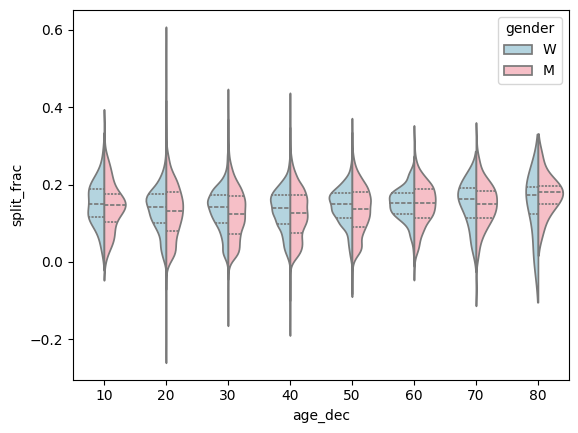

In [19]:
men = (data.gender == 'M')
women = (data.gender == 'W') 
#men을 boolean 인덱스로 만들어준거임! 남성 여성만 각각 추출해내기위해.. 대박방법
#저값이 M인건 men 인덱스다. 댑악 

with sns.axes_style(style=None):
     sns.violinplot(x="age_dec", y="split_frac", hue="gender", data=data, split=True, inner="quartile",
                    palette=["lightblue", "lightpink"]);
#hue는 구분 정도?

p.302~ 서브플롯 / 텍스트와 주석

In [49]:
births=pd.read_csv('./births.csv')
births.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


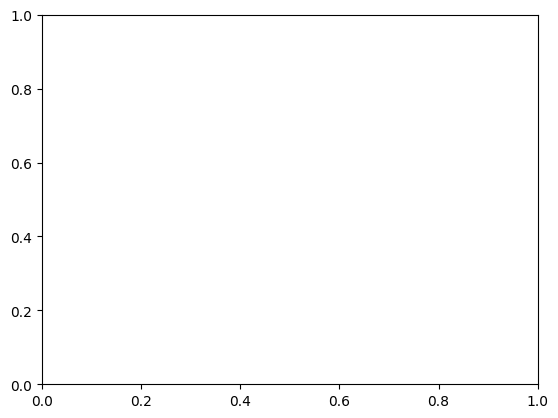

In [28]:
fig, ax = plt.subplots()

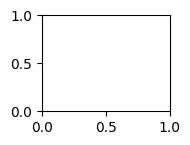

In [29]:
ax2 = plt.axes([0.65, 0.65, 0.2, 0.2])

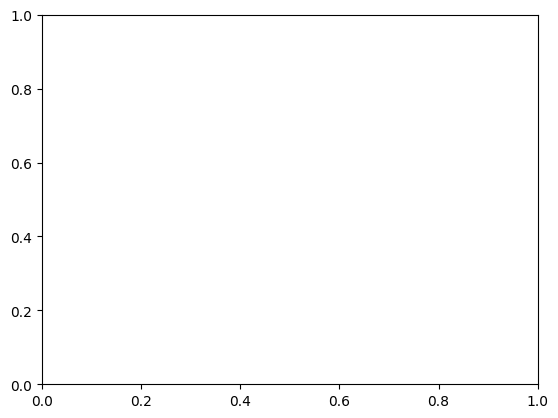

In [32]:
ax1 = plt.axes()

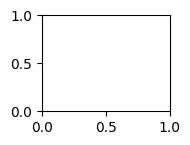

In [33]:
ax2 = plt.axes([0.65, 0.65, 0.2, 0.2])
#mat에서 사각형은 이런 방식으로 만든다는거. 

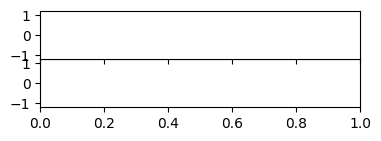

In [35]:
fig = plt.figure()
ax1=fig.add_axes([0, 0, 0.5, .1], ylim=(-1.2, 1.2))
ax2=fig.add_axes([0, .1, 0.5, .1], xticklabels=[], ylim=(-1.2, 1.2))

Text(0.5, 0.5, '(2, 3)')

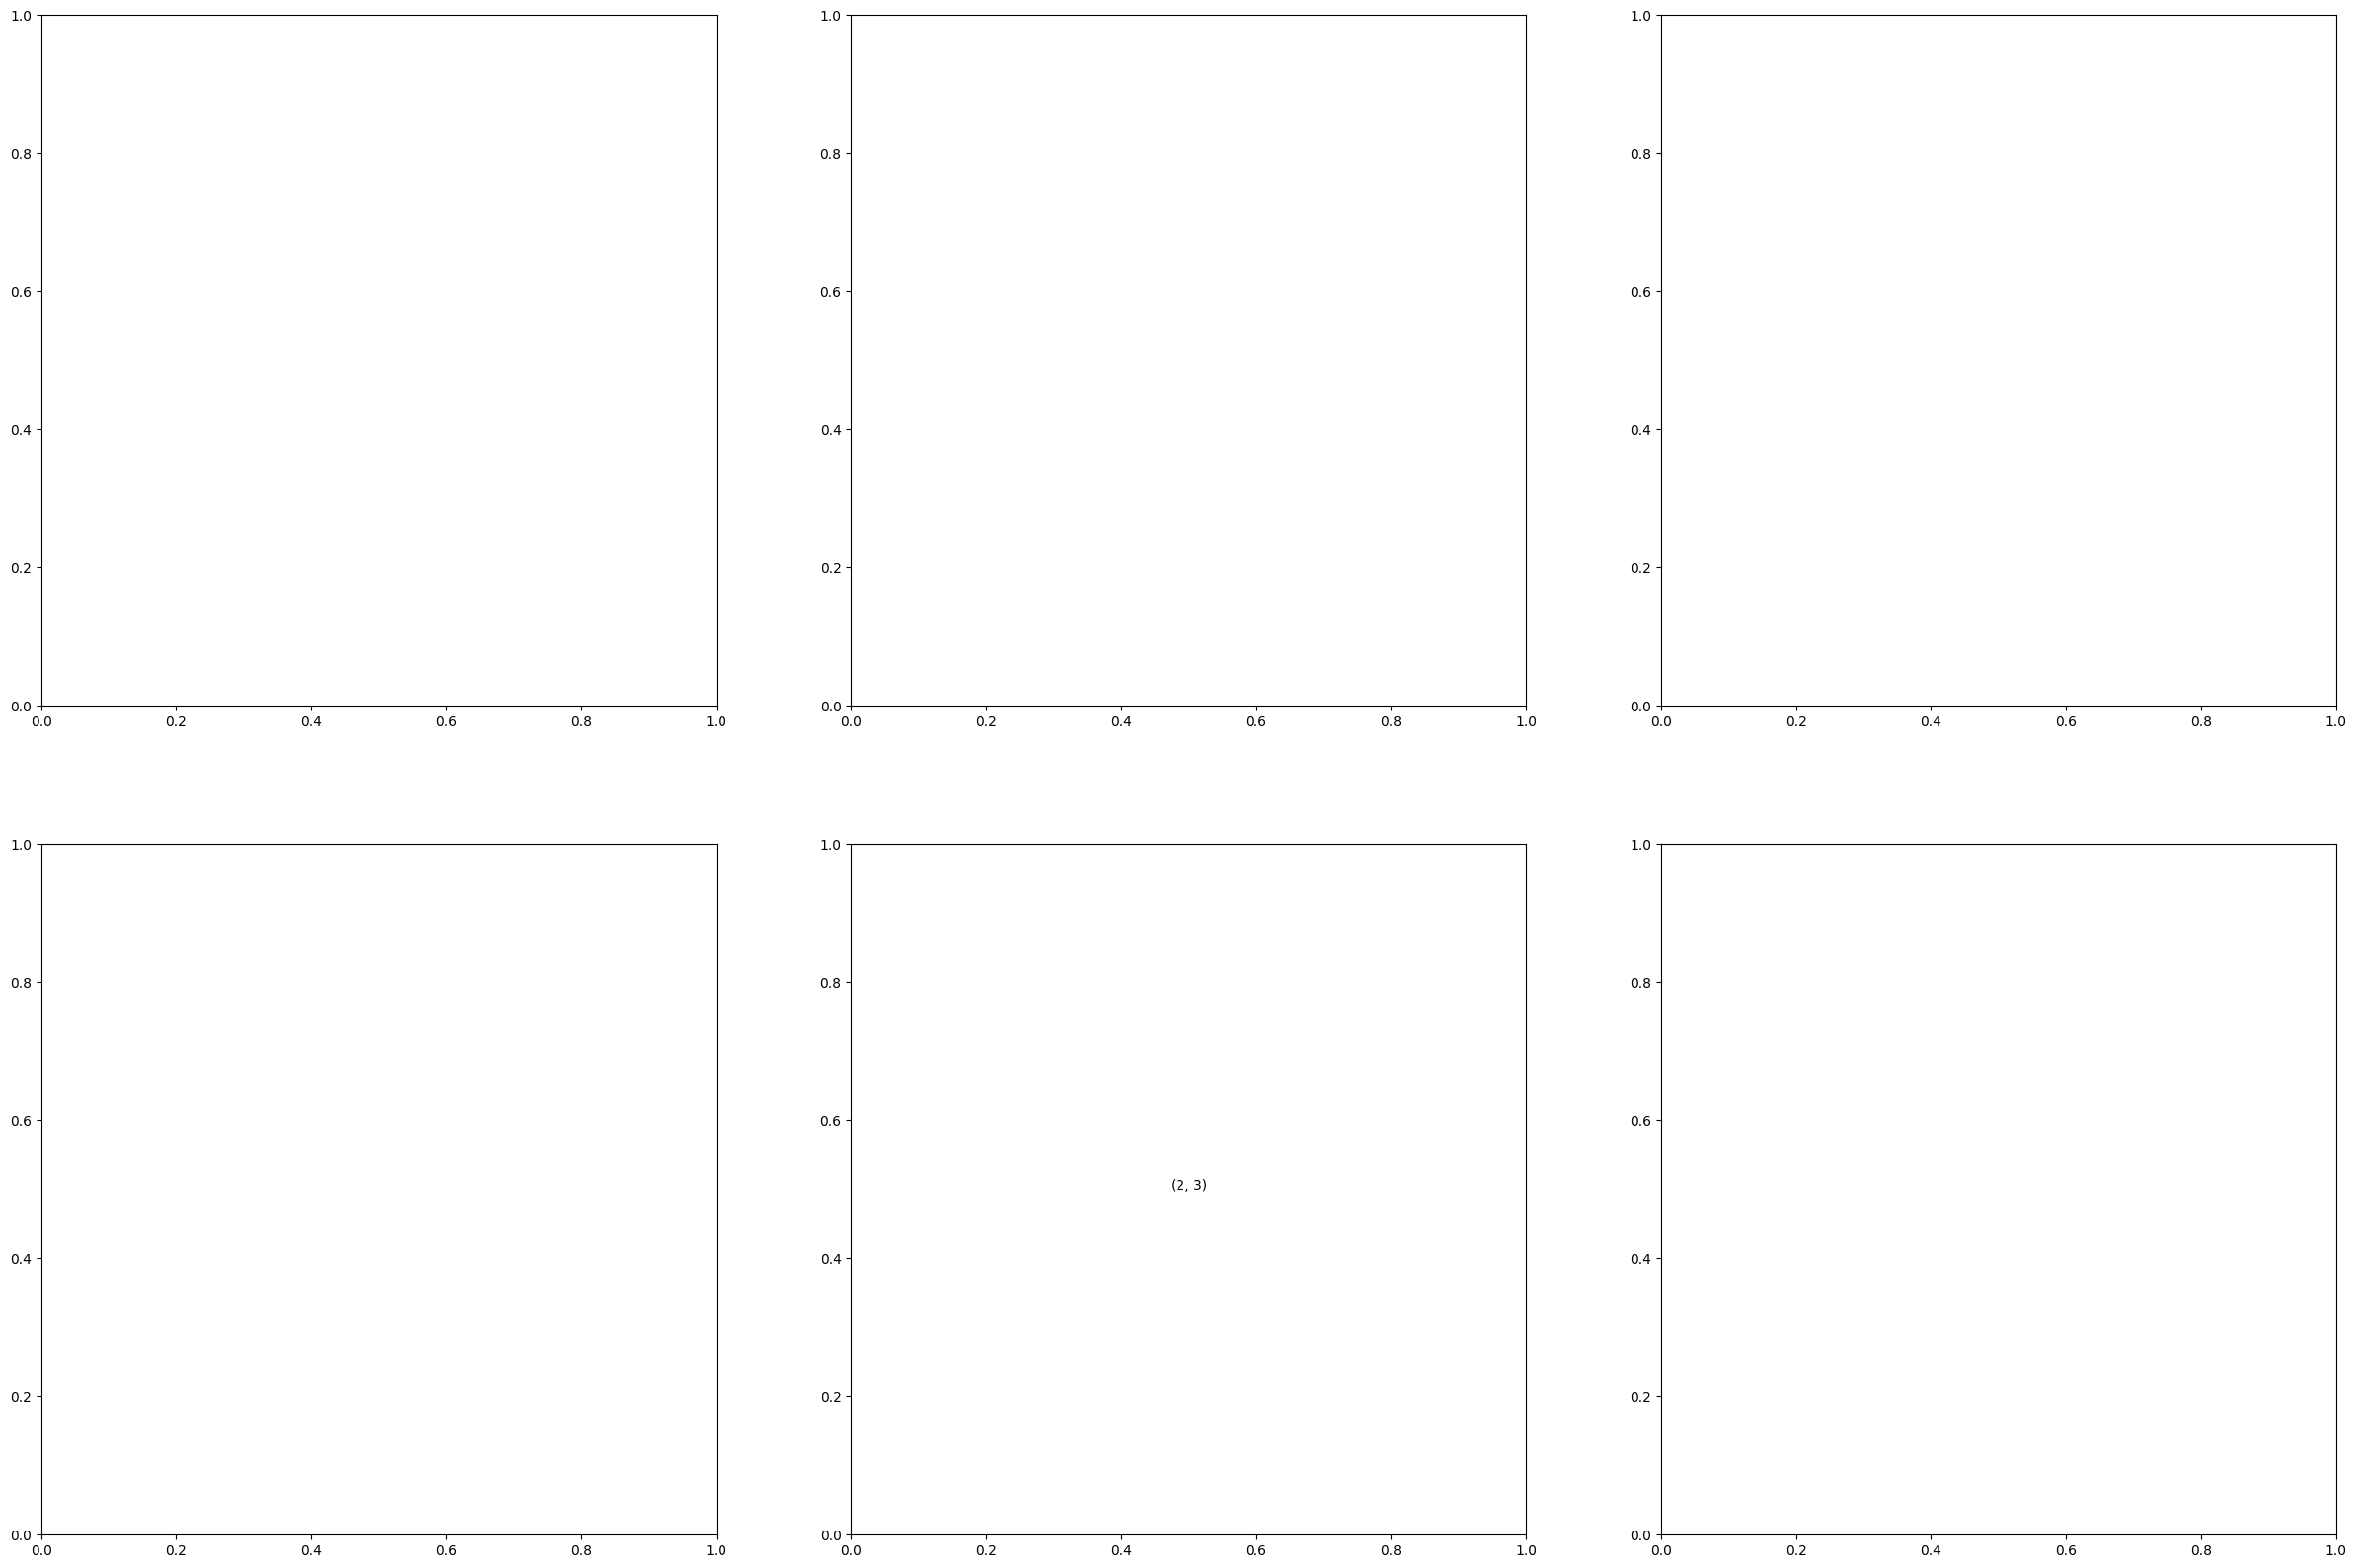

In [38]:
fig, ax = plt.subplots(2, 3, figsize=(30,20))
ax[1, 1].text(0.5, 0.5, str((2,3)), ha='center')

In [50]:
births.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [51]:
#데이터 사용 전 데이터 전처리하고 플로팅 - 평균, 표준편차 등 계산해서  데이터를 필터링하여 이상치를 제거하거나 데이터를 정제하는 데 사용
quartiles = np.percentile(births['births'],[25,50,75])
mu, sig = quartiles[1], 0.74 * (quartiles[2] - quartiles[0])
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')

In [52]:
births['day']=births['day'].astype(int)

In [53]:
births.dtypes

year       int64
month      int64
day        int32
gender    object
births     int64
dtype: object

In [72]:
from datetime import datetime

In [77]:
births.index=pd.to_datetime(10000*births.year + 100*births.month + births.day, format ='%Y%m%d')
#인덱스를 저 형식으로 변환해준다.
#쪼갈라져있는 저거를 format 이걸로 모아가지고, datetime 타입의 인덱스로 만들어주기 위해서.
births_by_date=births.pivot_table('births',[births.index.month, births.index.day])
#pivot_table은 특정 column만을 가지고 데이터프레임을 만드는거. 
births_by_date.head()

births
1 1  4009.225
  2  4247.400
  3  4500.900
  4  4571.350
  5  4603.625

In [75]:
births_by_date.index=[pd.to_datetime(f"2012-{month}-{day}")
                    for (month, day) in births_by_date.index]

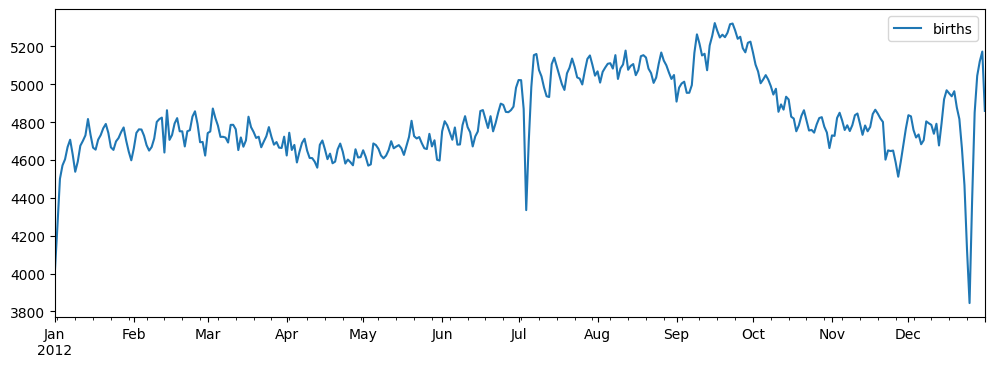

In [76]:
fig,ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax);

변환 및 텍스트 위치

(0.0, 10.0, 0.0, 10.0)

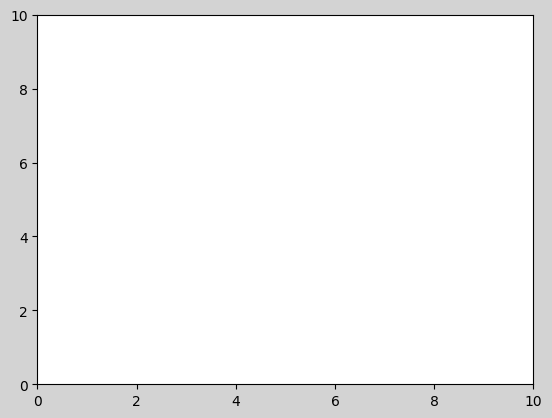

In [78]:
fig, ax = plt.subplots(facecolor = 'lightgray')
ax.axis([0, 10, 0, 10])

In [81]:
#기본값이 있지만 그래도 직접, 텍스트를 축 자체에 꽂아버린다. 데이터와는 독립적으로.
ax.text(1, 5, ". Data: (1, 5)", transform=ax.transData)
ax.text(0.5, 0.1, ". Axes : (0.5, 0.1)", transform=ax.transAxes)
ax.text(0.2, 0.2, ". Figure : (0.2, 0.2)", transform =fig.transFigure);

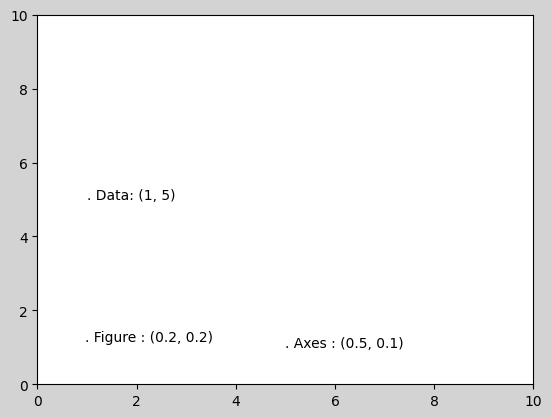

In [82]:
fig, ax = plt.subplots(facecolor = 'lightgray')
ax.axis([0, 10, 0, 10])
ax.text(1, 5, ". Data: (1, 5)", transform=ax.transData) #좌표. 좌표는 진짜 저 숫자랑 관련있는거.숫자상 그잡채!!
#좋은점 -축의 리미트들을 바꾸어도 얘는 같은 자리를 가리키게 할수있으므로 그런장점이있음!!! 
ax.text(0.5, 0.1, ". Axes : (0.5, 0.1)", transform=ax.transAxes) #축과 관련된 변환, 축 차원의 단위로. ax 즉 축에서 0.5, 0.1인거.
#하얀거를 axes라고 봤을때, 이것도 (1,1)이 저 오른쪽 위기 때문에. 
ax.text(0.2, 0.2, ". Figure : (0.2, 0.2)", transform =fig.transFigure); #그림 차원의 단위로, 그림과 관련된 변환. 전체를 1,1로 봤을때. 

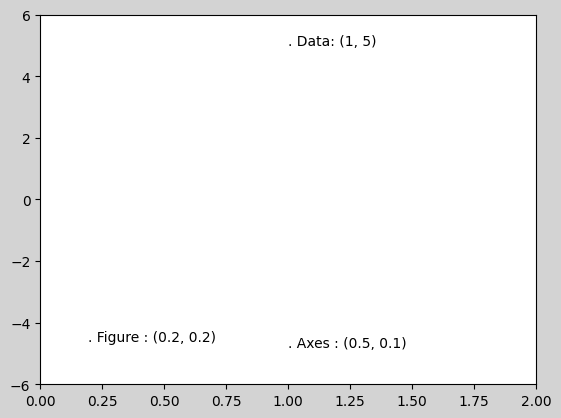

In [83]:
ax.set_xlim(0, 2)
ax.set_ylim(-6, 6)
fig
#축 한계값을 바꾸었음에도 불구하고, 축에서의 값. 그리고 그림에서의 도화지에서의 자리는 바뀌지 않으므로 좌표설정 data만 바뀌는거 알수있음.

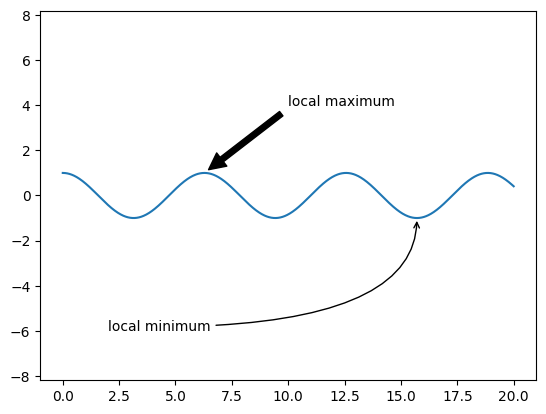

In [84]:
#matplotlib inline
fig, ax= plt.subplots()

x=np.linspace(0, 20, 1000)
ax.plot(x, np.cos(x))
ax.axis('equal')

ax.annotate('local maximum', xy=(6.28, 1), xytext=(10, 4),  #xy는 가리킬위치, xytext는 텍스트 시작위치. 
          arrowprops=dict(facecolor='black', shrink=0.05)) #arrowprops=dict는 화살표 설정.
ax.annotate('local minimum', xy=(5*np.pi, -1), xytext=(2, -6),
arrowprops=dict(arrowstyle="->", connectionstyle="angle3,angleA=0,angleB=-90"));

In [95]:
sns.set_style("whitegrid")

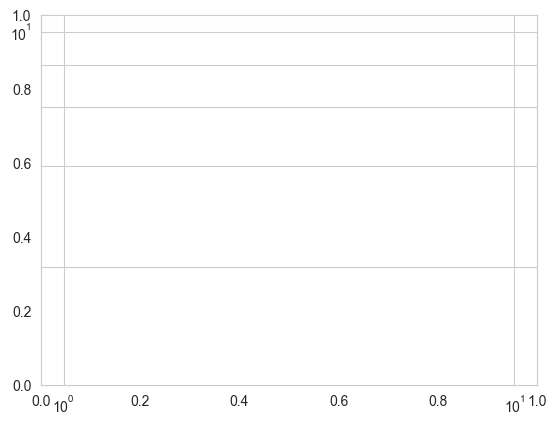

In [118]:
import matplotlib.ticker as ticker 

fig, ax = plt.subplots()
ax=plt.axes(xscale='log', yscale='log')
ax.yaxis.set_major_locator(ticker.MultipleLocator(2))
#locator를 이용, 그리고 ticker를 import해서 눈금을 조절하는 여러가지 방법들.. 

In [96]:
print(ax.xaxis.get_major_locator())

In [97]:
print(ax.xaxis.get_major_formatter())

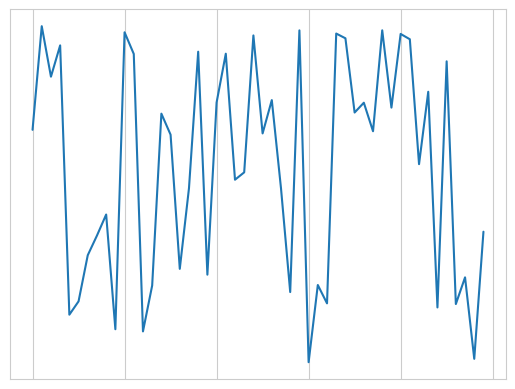

In [98]:
ax=plt.axes()
ax.plot(np.random.rand(50))
ax.yaxis.set_major_locator(plt.NullLocator())
ax.xaxis.set_major_formatter(plt.NullFormatter())
#NullLocator 눈금 감추기.

#locator는 축의 눈금을 어디에 배치할지. 
#formatter는 특정 날짜. 소수점 자릿수.천단위 등 특정 형식으로 포맷해서 눈금을 나타낼때. 
#formatter는 눈금의 텍스트를멀로할지. 

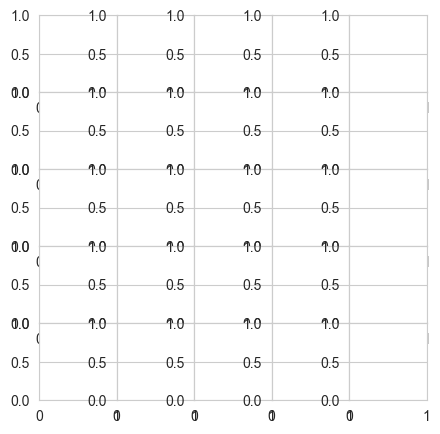

In [99]:
fig, ax = plt.subplots(5, 5, figsize=(5,5))
fig.subplots_adjust(hspace=0, wspace=0)

In [100]:
from sklearn.datasets import fetch_olivetti_faces
faces=fetch_olivetti_faces().images

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\user\scikit_learn_data


In [107]:
for i in range(5):
     for j in range(5):
          ax[i, j].xaxis.set_major_locator(plt.NullLocator())
          ax[i, j].yaxis.set_major_locator(plt.NullLocator())
          ax[i, j].imshow(faces[10*i+j], cmap="bone")

IndexError: index 4 is out of bounds for axis 1 with size 4

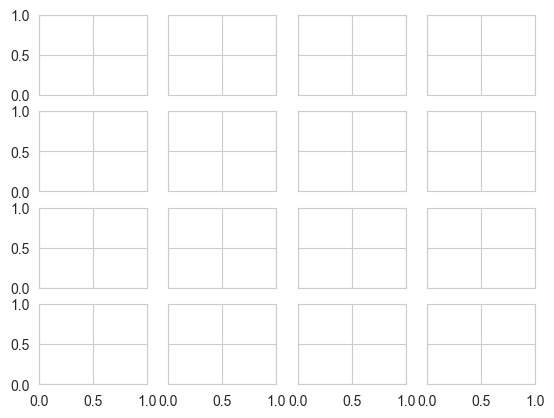

In [108]:
fig, ax = plt.subplots(4, 4, sharex=True, sharey=True)

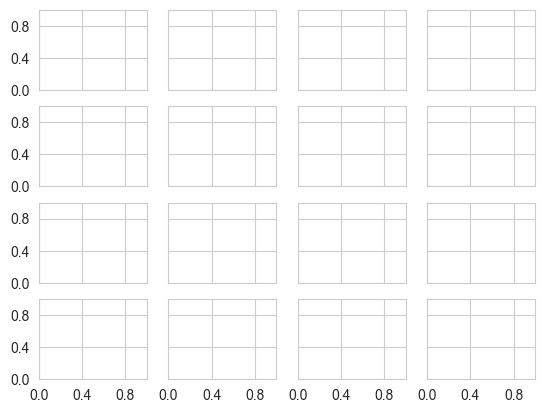

In [109]:
for axi in ax.flat:
     axi.xaxis.set_major_locator(plt.MaxNLocator(3))
     axi.yaxis.set_major_locator(plt.MaxNLocator(3))
     
fig

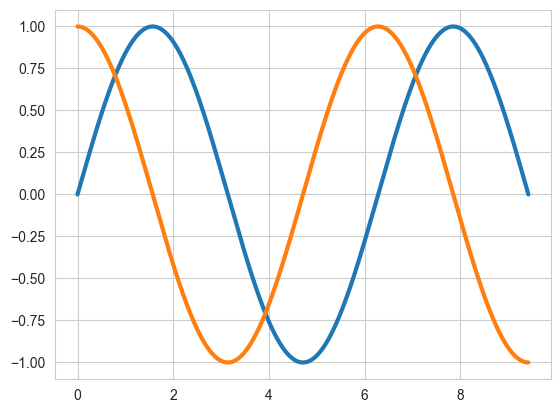

In [110]:
fig, ax = plt.subplots()
x=np.linspace(0, 3*np.pi, 1000)
ax.plot(x, np.sin(x), lw=3, label='Sine')
ax.plot(x, np.cos(x), lw=3, label='Cosine')

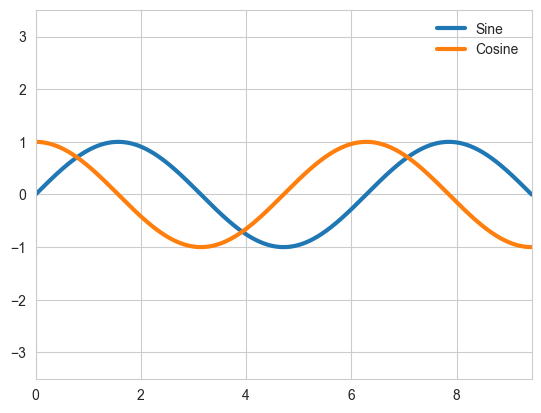

In [114]:
#그리드, 범례, 한계값 설정
ax.grid(True) #그리드-표시함
ax.legend(frameon=False) #범례 표시함-테두리 없음
ax.axis('equal') #축의 비율-eqaul
ax.set_xlim(0, 3*np.pi); #x축 lim설정

fig

한글 깨짐없이 출력

In [121]:
import matplotlib as mpl

In [122]:
print ('버전: ', mpl.__version__)
print ('설치 위치: ', mpl.__file__)
print ('설정 위치: ', mpl.get_configdir())
print ('캐시 위치: ', mpl.get_cachedir())
print ('설정 파일 위치: ', mpl.matplotlib_fname())     


버전:  3.9.0
설치 위치:  C:\Users\user\AppData\Roaming\Python\Python39\site-packages\matplotlib\__init__.py
설정 위치:  C:\Users\user\.matplotlib
캐시 위치:  C:\Users\user\.matplotlib
설정 파일 위치:  C:\Users\user\AppData\Roaming\Python\Python39\site-packages\matplotlib\mpl-data\matplotlibrc


In [126]:
#나눔글꼴 압축해제 후 d2coding 파일 들어가서 all 그파일을 모든사용자용으로 설치.
import matplotlib.font_manager as fm

font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')

f = [f.name for f in fm.fontManager.ttflist]
print(len(font_list))
# 10개의 폰트 명 만 출력
f[:10]

379


['cmtt10',
 'DejaVu Sans',
 'STIXSizeFourSym',
 'DejaVu Sans',
 'cmb10',
 'DejaVu Serif',
 'STIXGeneral',
 'cmmi10',
 'STIXNonUnicode',
 'DejaVu Sans Mono']

In [127]:
f = [f.name for f in fm.fontManager.ttflist]
print(len(font_list))
# 10개의 폰트 명 만 출력
f[:10]

379


['cmtt10',
 'DejaVu Sans',
 'STIXSizeFourSym',
 'DejaVu Sans',
 'cmb10',
 'DejaVu Serif',
 'STIXGeneral',
 'cmmi10',
 'STIXNonUnicode',
 'DejaVu Sans Mono']

In [128]:
[(f.name, f.fname) for f in fm.fontManager.ttflist if 'Nanum' in f.name]


[]

In [160]:
#폰트 이름 얻어오기
#font 설정

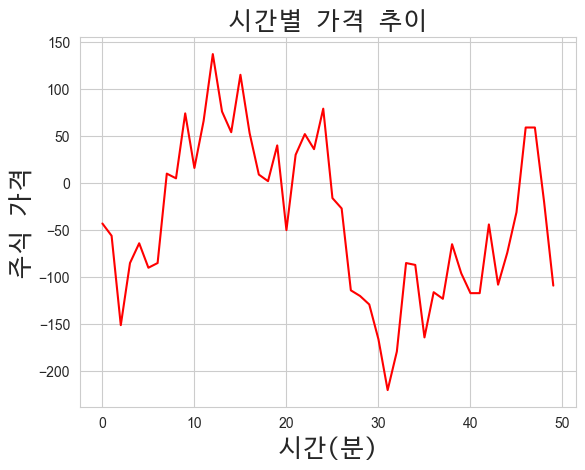

In [162]:
import matplotlib.pyplot as plt
data = np.random.randint(-100, 100, 50).cumsum()

plt.plot(range(50), data, 'r')
plt.title('시간별 가격 추이', fontproperties=fontprop)
plt.ylabel('주식 가격', fontproperties=fontprop)
plt.xlabel('시간(분)', fontproperties=fontprop)
plt.show()

Matplotlib 설정과 스타일시트

In [163]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.family'] = 'sans-serif'

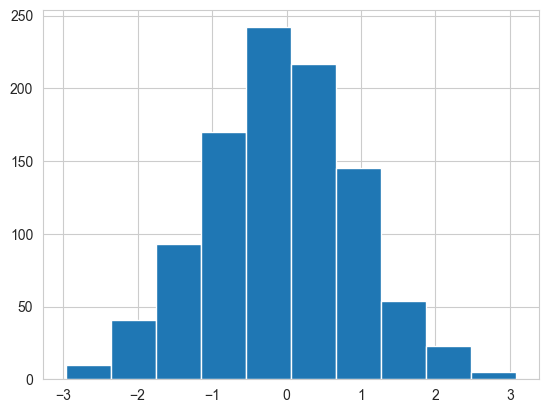

In [164]:
x = np.random.randn(1000)
plt.hist(x);

(array([ 10.,  41.,  93., 170., 242., 217., 145.,  54.,  23.,   5.]),
 array([-2.96704412, -2.36165996, -1.7562758 , -1.15089164, -0.54550749,
         0.05987667,  0.66526083,  1.27064498,  1.87602914,  2.4814133 ,
         3.08679746]),
 <BarContainer object of 10 artists>)

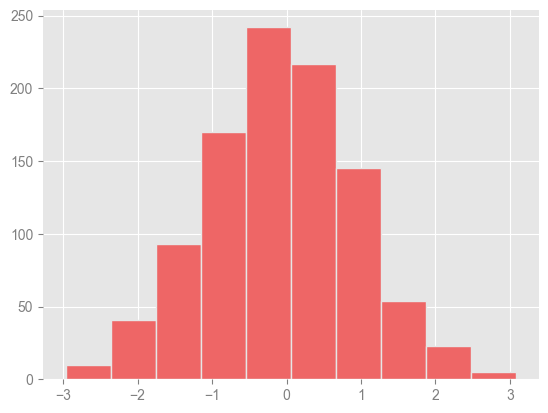

In [166]:
ax = plt.axes(facecolor = '#E6E6E6')
ax.set_axisbelow(True)
#배경 회색으로 만들고

#그리드 선 하얗게
plt.grid(color='w', linestyle='solid')

#축의 선(spine)을 숨긴다. 
for spine in ax.spines.values():
     spine.set_visible(False) #축 선 숨김.

#위쪽, 오른쪽 눈금을 숨긴다.
ax.xaxis.tick_bottom()
ax.yaxis.tick_left()

#눈금과 레이블 색을 밝게 변경한다.
ax.tick_params(colors='gray', direction='out')
for tick in ax.get_xticklabels():
     tick.set_color('gray')
for tick in ax.get_yticklabels():
     tick.set_color('gray')

#히스토그램 면과 테두리 색 조절한다.
ax.hist(x, edgecolor='#E6E6E6', color='#EE6666')


In [167]:
#이 기본값들을 한번에 수정하는 방법-rcParams
#변경사항을 쉽게 초기화할 수 있도록 rcParams의 딕셔너리의 사본을 저장한다. 
IPython_default=plt.rcParams.copy()

In [168]:
from matplotlib import cycler 

In [171]:
colors=cycler('color', ['#EE6666','#3388BB','#9988DD','#EECC55','#88BB44','#FFBBBB'])
#그래프가 그려질때, 이 색상표를 순환하도록 

#plt.rc 함수를 이용해서 쉽고빠르게!! 
#약간 rc에다가 저게 다 저장되어있어서 명시하고 뒤에 내가 원하는 속성들 쓰면됨 
plt.rc('axes', facecolor='#E6E6E6', edgecolor='none', axisbelow=True, grid=True, prop_cycle=colors)
plt.rc('grid', color='w', linestyle='solid')
plt.rc('xtick', direction='out', color='gray')
plt.rc('ytick', direction='out', color='gray')
plt.rc('patch', edgecolor='#E6E6E6')
plt.rc('lines', linewidth=2)

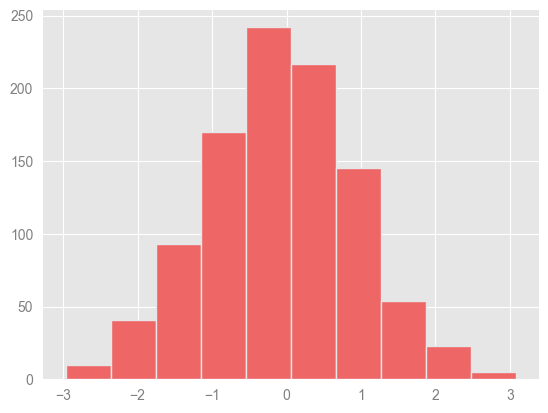

In [172]:
plt.hist(x);

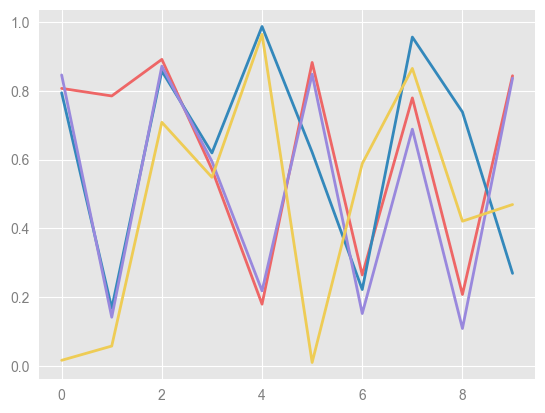

In [173]:
for i in range(4):
     plt.plot(np.random.rand(10))

In [174]:
plt.style.available[:5]

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh']

In [175]:
plt.style.use( '_mpl-gallery-nogrid')

In [176]:
#두개의 기본 유형 플롯을 만드는 함수 생성
def hist_and_lines():
     np.random.seed(0)
     fig, ax = plt.subplots(1, 2, figsize=(11, 4))
     ax[0].hist(np.random.randn(1000))
     for i in range(3):
          ax[1].plot(np.random.rand(10))
     ax[1].legend(['a','b','c'], loc='lower left')

In [177]:
#rcParams 초기화
plt.rcParams.update(IPython_default);

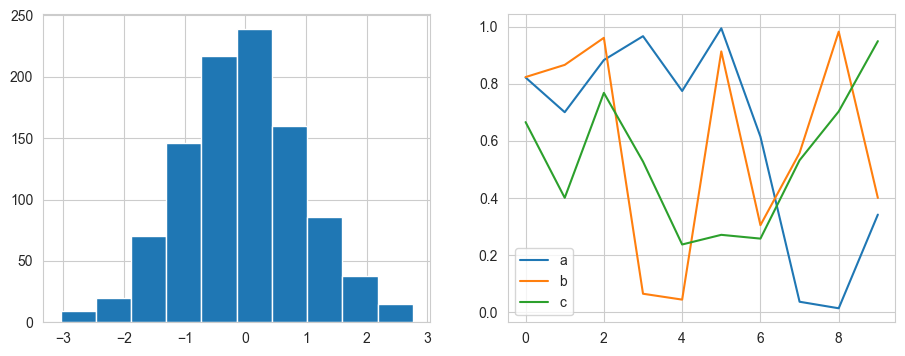

In [178]:
hist_and_lines() #나는 seaborn 있어서 그냥 seaborn스타일로 나옴 굿굿 

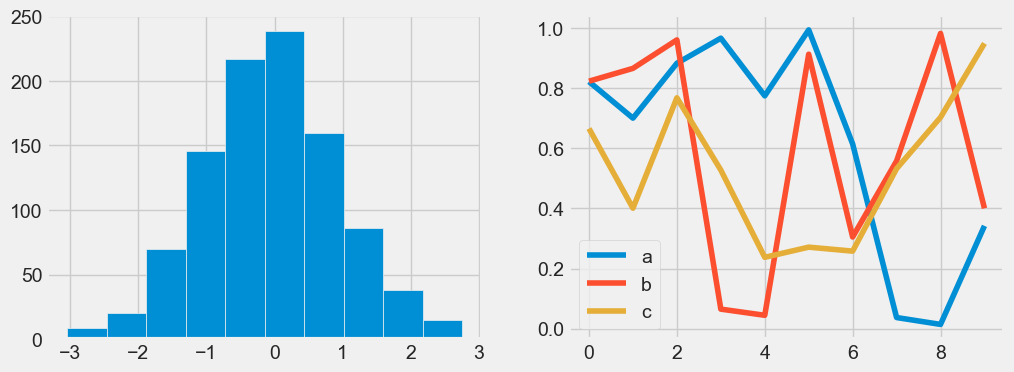

In [179]:
#FIveThirtyEight스타일

with plt.style.context('fivethirtyeight'):
     hist_and_lines()

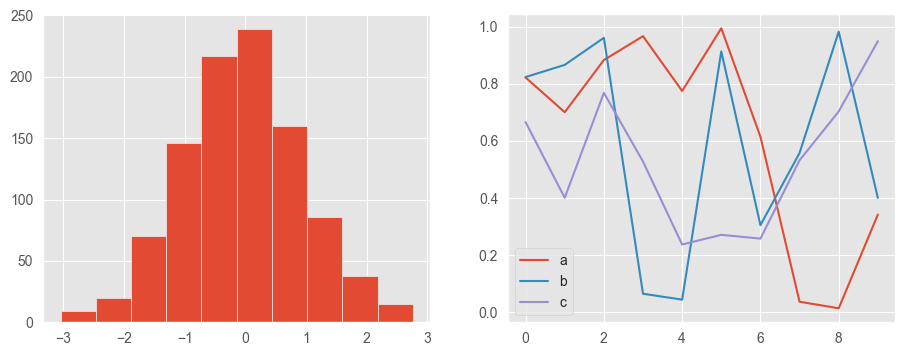

In [181]:
#ggplot 스타일

with plt.style.context('ggplot'):
     hist_and_lines()

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  func(*args, **kwargs)
c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


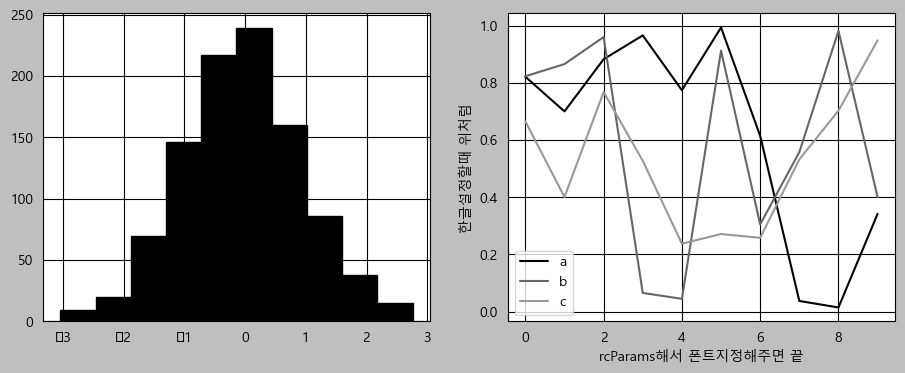

In [212]:
plt.rcParams['font.family'] ='Malgun Gothic'

with plt.style.context('grayscale'):
     hist_and_lines()
     plt.xlabel('rcParams해서 폰트지정해주면 끝')
     plt.ylabel('한글설정할때 위처럼')


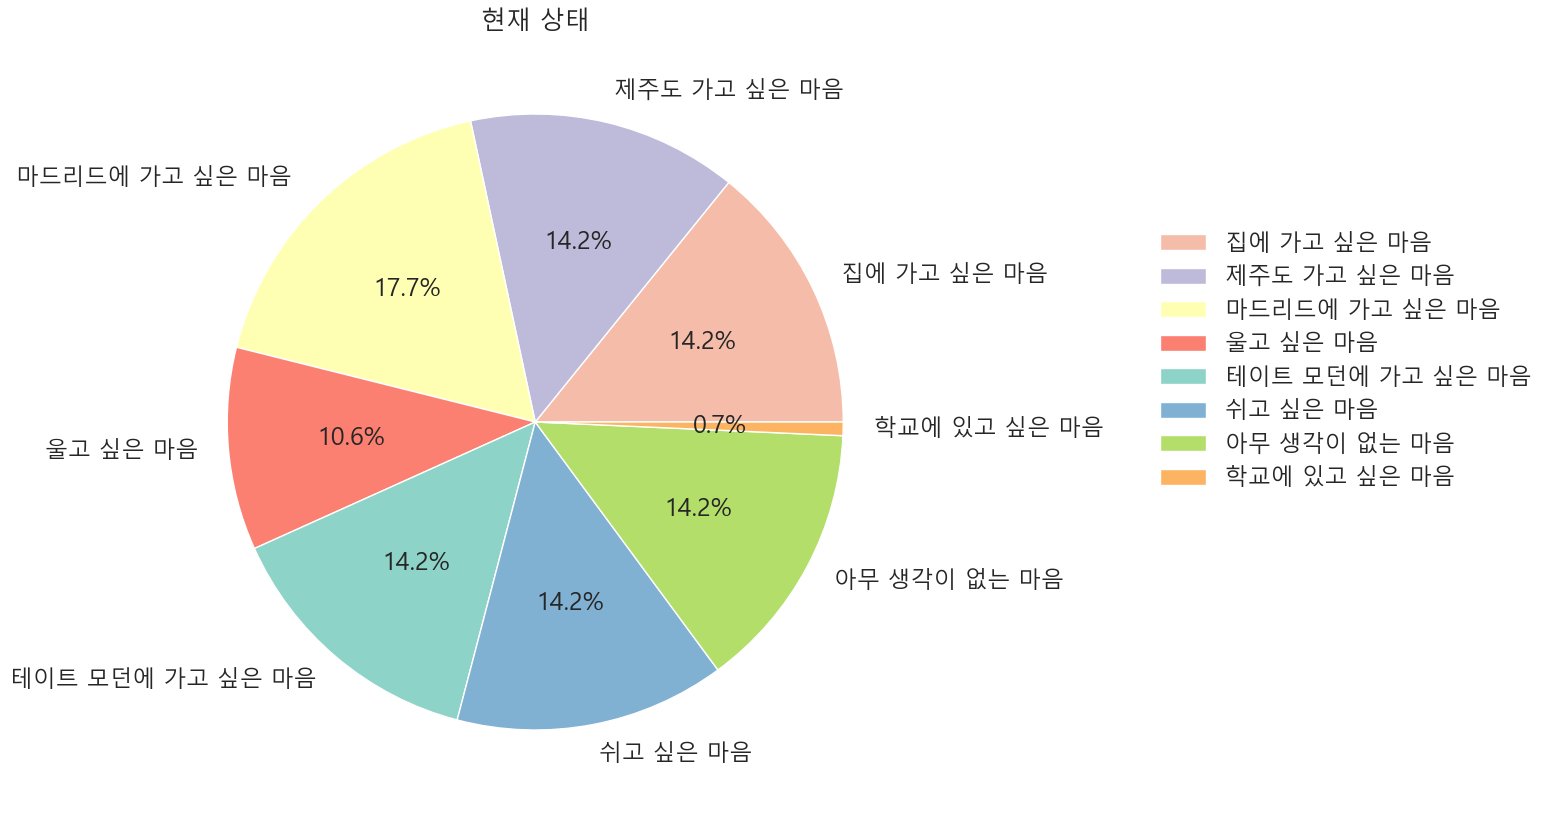

In [219]:

sns.set(font_scale = 1.5, font='Malgun Gothic')
plt.figure(figsize=(10,10))
# Data
values = [20, 20, 25, 15, 20, 20, 20, 1]
labels = ['집에 가고 싶은 마음', '제주도 가고 싶은 마음', 
          '마드리드에 가고 싶은 마음 ', '울고 싶은 마음',
          '테이트 모던에 가고 싶은 마음', '쉬고 싶은 마음',
          '아무 생각이 없는 마음', '학교에 있고 싶은 마음']
colors = ['#F5BCA9', '#BEBADA', '#FFFFB3', '#FB8072', '#8DD3C7', '#80B1D3', '#B3DE69', '#FDB462']
# Create the pie chart with custom colors
plt.pie(values, labels=labels, colors=colors, autopct='%1.1f%%')
# Add title
plt.title('현재 상태')
plt.legend(labels,loc = [1.3,0.4],frameon = False)

In [235]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from mpl_toolkits.mplot3d.axes3d import get_test_data  

#data 생성해주는. 툴킷 


In [221]:
X, Y, Z = get_test_data(0.05)

In [222]:
X.shape, Y.shape, Z.shape

((120, 120), (120, 120), (120, 120))

Text(0.5, 0, 'X')

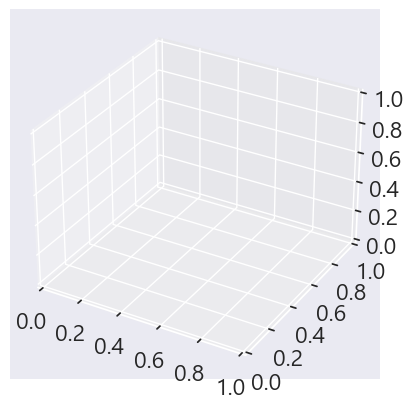

In [236]:
fig.ax = plt.subplots(subplot_kw=dict(projection='3d'))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X, Y, Z)
ax.set_xlabel('X')

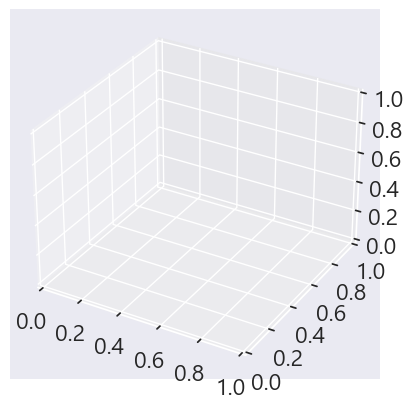

In [237]:
fig.ax = plt.subplots(subplot_kw=dict(projection='3d'))
ax = fig.add_subplot(111, projection='3d')

ax.plot_wireframe(X, Y, Z)
